In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from gensim import corpora, models, similarities
from gensim import corpora
import gensim
import pandas as pd
import numpy as np
import os
from glob import glob
from collections import Counter
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
import sys
from sklearn import linear_model
sys.path.append(os.getcwd())
import matplotlib.pyplot as plt
os.chdir('/Users/xiaodiu/Documents/github/JudgeSentences/train/')
from train_ngrams import textfeature
import numpy as np
%matplotlib inline


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.feature_extraction.text import TfidfTransformer
from scipy.sparse import hstack, vstack

## test on text features class

In [3]:
ngrams = textfeature()

In [9]:
## load data
train_data = ngrams.load_data('../holger_train_disparity_race.csv',index_col=0)
test_data = ngrams.load_data('../holger_test_disparity_race.csv', index_col=0)


load sucess from ../holger_train_disparity_race.csv
load sucess from ../holger_test_disparity_race.csv


In [6]:
judge_year_index = ngrams.load_data('../datasets/judge_year2index.pkl', format = 'pkl')
ngram_dict = ngrams.load_data('../datasets/grams_dict2002-2016/grams_dict.pkl', format = 'pkl')

bow_feature = ngrams.load_data('../datasets/grams_dict2002-2016/bow_features.pkl', format = 'pkl')
bi_feature = ngrams.load_data('../datasets/grams_dict2002-2016/2grams_feature.pkl', format = 'pkl')
tri_feature = ngrams.load_data('../datasets/grams_dict2002-2016/3grams_feature.pkl', format = 'pkl')
for_feature = ngrams.load_data('../datasets/grams_dict2002-2016/4grams_feature.pkl', format = 'pkl')
fiv_feature = ngrams.load_data('../datasets/grams_dict2002-2016/5grams_feature.pkl', format = 'pkl')

load sucess from ../datasets/judge_year2index.pkl
load sucess from ../datasets/grams_dict2002-2016/grams_dict.pkl
load sucess from ../datasets/grams_dict2002-2016/bow_features.pkl
load sucess from ../datasets/grams_dict2002-2016/2grams_feature.pkl
load sucess from ../datasets/grams_dict2002-2016/3grams_feature.pkl
load sucess from ../datasets/grams_dict2002-2016/4grams_feature.pkl
load sucess from ../datasets/grams_dict2002-2016/5grams_feature.pkl


In [7]:
features = bi_feature

In [10]:
ngrams.process_data(train_data, judge_year_index, features, istrain = True, 
                    drops= ['judgeid', 'disparity_race','sentyr'],y_label = 'disparity_race')
ngrams.process_data(test_data, judge_year_index, features, istrain = False,
                    drops= ['judgeid', 'disparity_race','sentyr'],y_label = 'disparity_race')

BRYANT, WILLIAM B. 2003
BRYANT, WILLIAM B. 2005
LOWE, MARY JOHNSON 2006
BRYANT, WILLIAM B. 2003
BRYANT, WILLIAM B. 2005
LOWE, MARY JOHNSON 2006


In [11]:
ngrams.get_train_test(features)
bow_train, bow_test = ngrams.get_vector()
X_train, X_test = ngrams.get_tfidf(bow_train, bow_test)
train_total, test_total = ngrams.combine_data(X_train, X_test)

In [41]:
regr_bow = linear_model.LinearRegression()
y_pre = ngrams.model_pre(regr_bow, train_total, test_total)

## plot


Mean squared error: 0.0169


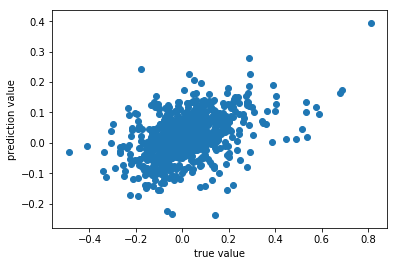

In [42]:
ngrams.plot_scatter(y_pre, name = 'bi_gram_reg_disparity_race.png')

In [ ]:
## trainning on USSC_dataset

In [46]:
USSC_train_data = pd.read_csv('../Trac_USSC_train_judgeyear2.csv', index_col=0)
USSC_test_data  = pd.read_csv('../Trac_USSC_test_judgeyear2.csv', index_col=0)

In [ ]:
### get the ngrams for ussc dataset

## Train LSTM Attension model

In [12]:
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical

from keras.layers import Embedding
from keras.layers import Dense, Input, Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding, Merge, Dropout, LSTM, GRU, Bidirectional, TimeDistributed
from keras.models import Model

from keras import backend as K
from keras.engine.topology import Layer, InputSpec

from nltk import tokenize

In [27]:
judge_year_case = pd.read_pickle('../datasets/judge2year_case.pkl')
opinion2floder = pd.read_pickle('../datasets/opinion2floder.pkl')
judges = judge_year_case.keys()
data_train = train_data
data_test = test_data

In [ ]:
MAX_REVIEWS = 1
MAX_SENTS = 30
MAX_SENT_LEN = 50
y_train = []
y_test = []
texts = []

In [29]:
year_range = (2002,2011)
for judge in judges:
    opinions = judge_year_case[judge]
    for year in opinions.keys():
        if year < year_range[0] or year > year_range[1]:
            continue
        opilist = opinions[year]
        if len(opilist) > MAX_REVIEWS:
            MAX_REVIEWS = len(opilist)
        for opi in opilist:    
            fold = opinion2floder[str(opi)]
            filepath = '../rawdata/text/' + fold + '/' + str(opi) + '.txt'
            #print(filepath)
            text = open(filepath).read()    
            normtext = text.strip().lower()
            texts.append(normtext)
            sentences = tokenize.sent_tokenize(text)
            if len(sentences) > MAX_SENTS :
                MAX_SENTS = len(sentences)
            for sent in sentences:
                if len(sent) > MAX_SENT_LEN:
                    MAX_SENT_LEN = len(sent)

KeyboardInterrupt: 

In [64]:
train_len = 0
for i in train_data.index:
    senty = train_data.sentyr[i]
    judge = train_data.judgeid[i]
    try :
        opinions = judge_year_case[judge][senty]
        if len(opinions) == 0:
            print('no opnions this %s for %s' %(senty, judge))
            continue
            
    except KeyError :
        print('no opnions this %s for %s' %(senty, judge))
    
    
        

no opnions this 2011 for MOORE, WILLIAM T., JR.
2
1
14
9
no opnions this 2009 for PANNELL, CHARLES A., JR.
2
no opnions this 2004 for STENGEL, LAWRENCE F.
5
9
0
25
no opnions this 2009 for MCKINLEY, JOSEPH H., JR.
no opnions this 2006 for STRAND, ROGER G.
no opnions this 2009 for SARGUS, EDMUND A., JR.
1
0
0
1
7
4
9
23
3
4
0
1
0
2
5
no opnions this 2006 for ANDERSON, JOSEPH F., JR.
12
8
12
4
6
5
1
no opnions this 2011 for CONMY, PATRICK A.
3
13
no opnions this 2010 for LINDBERG, GEORGE W.
5
0
17
2
no opnions this 2004 for NOWLIN, JAMES R.
3
10
no opnions this 2006 for HIBBLER, WILLIAM J.
25
0
4
1
1
0
1
0
2
6
25
no opnions this 2005 for CASTAGNA, WILLIAM J.
3
4
5
no opnions this 2008 for NORTON, DAVID C.
0
1
2
12
2
4
22
16
7
0
2
no opnions this 2011 for URBANSKI, MICHAEL F.
7
5
3
0
5
6
5
6
no opnions this 2004 for HERRERA, JUDITH C.
8
9
0
8
1
15
1
no opnions this 2003 for BARBIER, CARL J.
2
1
10
1
3
no opnions this 2005 for CONMY, PATRICK A.
2
1
1
1
no opnions this 2004 for BEISTLINE, R

In [ ]:
lstm_train = np.zeros((train_len,MAX_REVIEWS ,MAX_SENTS, MAX_SENT_LEN), dtype='int32')
lstm_test = np.zeros((test_len,MAX_REVIEWS ,MAX_SENTS, MAX_SENT_LEN), dtype='int32')

In [52]:
test = pd.read_pickle('../datasets/grams_dict1978-2012/grams-2.pkl')


In [54]:
test = Counter(test)

In [56]:
test.most_common()[1]

('district_court', 148814)